In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reading the files

In [4]:
cir=pd.read_csv("circuits.csv")
con_res=pd.read_csv("constructor_results.csv")
con_std=pd.read_csv("constructor_standings.csv")
con=pd.read_csv("constructors.csv")
stat=pd.read_csv("status.csv")
races=pd.read_csv("races.csv")
qua=pd.read_csv("qualifying.csv")
pit_stops=pd.read_csv("pit_stops.csv")
lap_times=pd.read_csv("lap_times.csv")
drivers=pd.read_csv("drivers.csv")
drivers_standings=pd.read_csv("driver_standings.csv")
sprint_results=pd.read_csv("sprint_results.csv")
seasons=pd.read_csv("seasons.csv")
results=pd.read_csv("results.csv")

CHECK WHETHER THE DATA IS LOADED PROPERLY

In [5]:
drivers_standings.head(10)

driverStandingsId  raceId  driverId  points  position positionText  wins
0                  1      18         1    10.0         1            1     1
1                  2      18         2     8.0         2            2     0
2                  3      18         3     6.0         3            3     0
3                  4      18         4     5.0         4            4     0
4                  5      18         5     4.0         5            5     0
5                  6      18         6     3.0         6            6     0
6                  7      18         7     2.0         7            7     0
7                  8      18         8     1.0         8            8     0
8                  9      19         1    14.0         1            1     1
9                 10      19         2    11.0         3            3     0

In [6]:
cir.head(10)

circuitId      circuitRef                            name      location  \
0          1     albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2          sepang    Sepang International Circuit  Kuala Lumpur   
2          3         bahrain   Bahrain International Circuit        Sakhir   
3          4       catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5        istanbul                   Istanbul Park      Istanbul   
5          6          monaco               Circuit de Monaco   Monte-Carlo   
6          7      villeneuve       Circuit Gilles Villeneuve      Montreal   
7          8     magny_cours   Circuit de Nevers Magny-Cours   Magny Cours   
8          9     silverstone             Silverstone Circuit   Silverstone   
9         10  hockenheimring                  Hockenheimring    Hockenheim   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   
5     Monaco  43.73470    7.42056    7   
6     Canada  45.50000  -73.52280   13   
7     France  46.86420    3.16361  228   
8         UK  52.07860   -1.01694  153   
9    Germany  49.32780    8.56583  103   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park  
5     http://en.wikipedia.org/wiki/Circuit_de_Monaco  
6  http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...  
7  http://en.wikipedia.org/wiki/Circuit_de_Nevers...  
8   http://en.wikipedia.org/wiki/Silverstone_Circuit  
9        http://en.wikipedia.org/wiki/Hockenheimring

In [7]:
pit_stops.head(10)

raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842
5     841        22     1   13  17:24:29   23.643         23643
6     841        20     1   14  17:25:17   22.603         22603
7     841       814     1   14  17:26:03   24.863         24863
8     841       816     1   14  17:26:50   25.259         25259
9     841        67     1   15  17:27:34   25.342         25342

In [8]:
results.head(10)

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   
5         6      18         6              3      8    13        6   
6         7      18         7              5     14    17        7   
7         8      18         8              6      1    15        8   
8         9      18         9              2      4     2       \N   
9        10      18        10              7     12    18       \N   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   
5            6              6     3.0    57           \N           \N   
6            7              7     2.0    55           \N           \N   
7            8              8     1.0    53           \N           \N   
8            R              9     0.0    47           \N           \N   
9            R             10     0.0    43           \N           \N   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1  
5         50   14       1:29.639         212.974        11  
6         22   12       1:29.534         213.224         5  
7         20    4       1:27.903         217.180         5  
8         15    9       1:28.753         215.100         4  
9         23   13       1:29.558         213.166         3

DELETING THE UNWANTED COLUMNS

In [9]:
races_df = races.copy()
races_df = races_df.drop(columns = ['url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'time'])
races_df = races_df.rename(columns ={'name':'race_name'})
races_df.head()

raceId  year  round  circuitId              race_name        date
0       1  2009      1          1  Australian Grand Prix  2009-03-29
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05
2       3  2009      3         17     Chinese Grand Prix  2009-04-19
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26
4       5  2009      5          4     Spanish Grand Prix  2009-05-10

MERGING THE DATAFRAME

In [10]:
circuits_df = cir.copy()
circuits_df =circuits_df.drop(columns = ['lat', 'lng', 'url'])
circuits_df = circuits_df.rename(columns={'name':'circuit_name', 'location':'city'})
circuits_df.head()


drivers_df = drivers.copy()
drivers_df =drivers_df.drop(columns =['driverRef', 'number', 'code', 'url'])
drivers_df['driver_name'] = drivers_df['forename'] + ' ' + drivers_df['surname']
drivers_df = drivers_df.drop(columns =['forename', 'surname'])
drivers_df.head()

constructors_df=con.copy()
constructors_df =constructors_df.drop(columns = ['url','constructorRef'])
constructors_df = constructors_df.rename(columns = {'name':'constructors_name'})
constructors_df.head()

constructorId constructors_name nationality
0              1           McLaren     British
1              2        BMW Sauber      German
2              3          Williams     British
3              4           Renault      French
4              5        Toro Rosso     Italian

In [11]:
merge_circuits = cir.merge(races, how="inner", on="circuitId")
merge_circuitsdf = merge_circuits[['year', 'date', 'name_y', 'name_x', 'location', 'country', 'lat', 'lng', 'time']]
merge_circuitsdf.head(5)

year        date                 name_y                          name_x  \
0  2009  2009-03-29  Australian Grand Prix  Albert Park Grand Prix Circuit   
1  2008  2008-03-16  Australian Grand Prix  Albert Park Grand Prix Circuit   
2  2007  2007-03-18  Australian Grand Prix  Albert Park Grand Prix Circuit   
3  2006  2006-04-02  Australian Grand Prix  Albert Park Grand Prix Circuit   
4  2005  2005-03-06  Australian Grand Prix  Albert Park Grand Prix Circuit   

    location    country      lat      lng      time  
0  Melbourne  Australia -37.8497  144.968  06:00:00  
1  Melbourne  Australia -37.8497  144.968  04:30:00  
2  Melbourne  Australia -37.8497  144.968  03:00:00  
3  Melbourne  Australia -37.8497  144.968  14:00:00  
4  Melbourne  Australia -37.8497  144.968  14:00:00

In [12]:
results_df = results.copy()
merged_df = results_df.merge(stat , on = 'statusId')
merged_df = merged_df.merge(races_df, on = 'raceId')
merged_df = merged_df.merge(drivers_df, on = 'driverId')
merged_df = merged_df.merge(constructors_df, on = 'constructorId')
merged_df = merged_df.merge(circuits_df, on = 'circuitId')
merged_df.head(10)


resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1       371      36         1              1      2     4        3   
2      7573       1         1              1      1    18       \N   
3     20352     338         1              1      2    11        6   
4     20780     841         1              1      3     2        2   
5     21234     860         1              1      4     1        3   
6       370      36         4              1      1     2        2   
7     22937     948         4              1     14    11       \N   
8     23392     969         4              1     14    12       \N   
9     23786     989         4              1     14    10        5   

  positionText  positionOrder  points  ...         dob nationality_x  \
0            1              1    10.0  ...  1985-01-07       British   
1            3              3     6.0  ...  1985-01-07       British   
2            D             20     0.0  ...  1985-01-07       British   
3            6              6     8.0  ...  1985-01-07       British   
4            2              2    18.0  ...  1985-01-07       British   
5            3              3    15.0  ...  1985-01-07       British   
6            2              2     8.0  ...  1981-07-29       Spanish   
7            R             21     0.0  ...  1981-07-29       Spanish   
8            R             14     0.0  ...  1981-07-29       Spanish   
9            5              5    10.0  ...  1981-07-29       Spanish   

       driver_name constructors_name nationality_y   circuitRef  \
0   Lewis Hamilton           McLaren       British  albert_park   
1   Lewis Hamilton           McLaren       British  albert_park   
2   Lewis Hamilton           McLaren       British  albert_park   
3   Lewis Hamilton           McLaren       British  albert_park   
4   Lewis Hamilton           McLaren       British  albert_park   
5   Lewis Hamilton           McLaren       British  albert_park   
6  Fernando Alonso           McLaren       British  albert_park   
7  Fernando Alonso           McLaren       British  albert_park   
8  Fernando Alonso           McLaren       British  albert_park   
9  Fernando Alonso           McLaren       British  albert_park   

                     circuit_name       city    country  alt  
0  Albert Park Grand Prix Circuit  Melbourne  Australia   10  
1  Albert Park Grand Prix Circuit  Melbourne  Australia   10  
2  Albert Park Grand Prix Circuit  Melbourne  Australia   10  
3  Albert Park Grand Prix Circuit  Melbourne  Australia   10  
4  Albert Park Grand Prix Circuit  Melbourne  Australia   10  
5  Albert Park Grand Prix Circuit  Melbourne  Australia   10  
6  Albert Park Grand Prix Circuit  Melbourne  Australia   10  
7  Albert Park Grand Prix Circuit  Melbourne  Australia   10  
8  Albert Park Grand Prix Circuit  Melbourne  Australia   10  
9  Albert Park Grand Prix Circuit  Melbourne  Australia   10  

[10 rows x 34 columns]

TOP 10 DRIVERS WITH MOST RACE ENTRIES

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


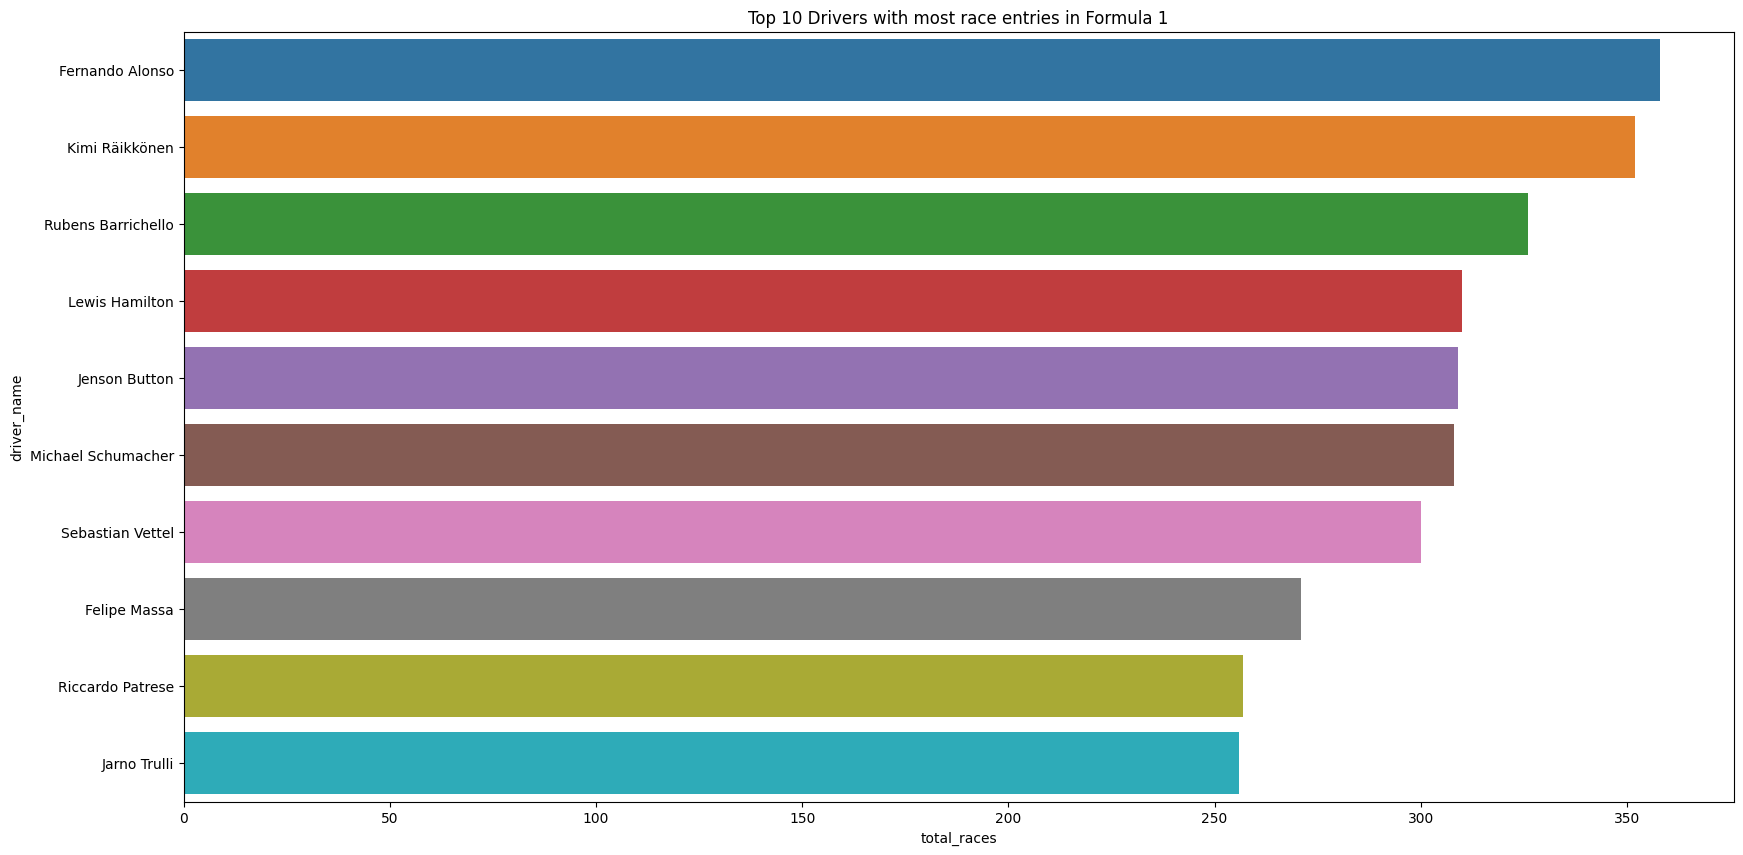

In [13]:

most_races = merged_df.groupby('driver_name')[['raceId']].count().reset_index()
most_races = most_races.sort_values('raceId', ascending= False).head(10)
most_races = most_races.rename(columns ={'raceId': 'total_races'})
plt.figure(figsize = (20,10))
plt.title('Top 10 Drivers with most race entries in Formula 1')
sns.barplot(x = 'total_races' , y = 'driver_name' , data = most_races )
plt.show()



TOP 10 DRIVERS WITH MOST LAPS

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


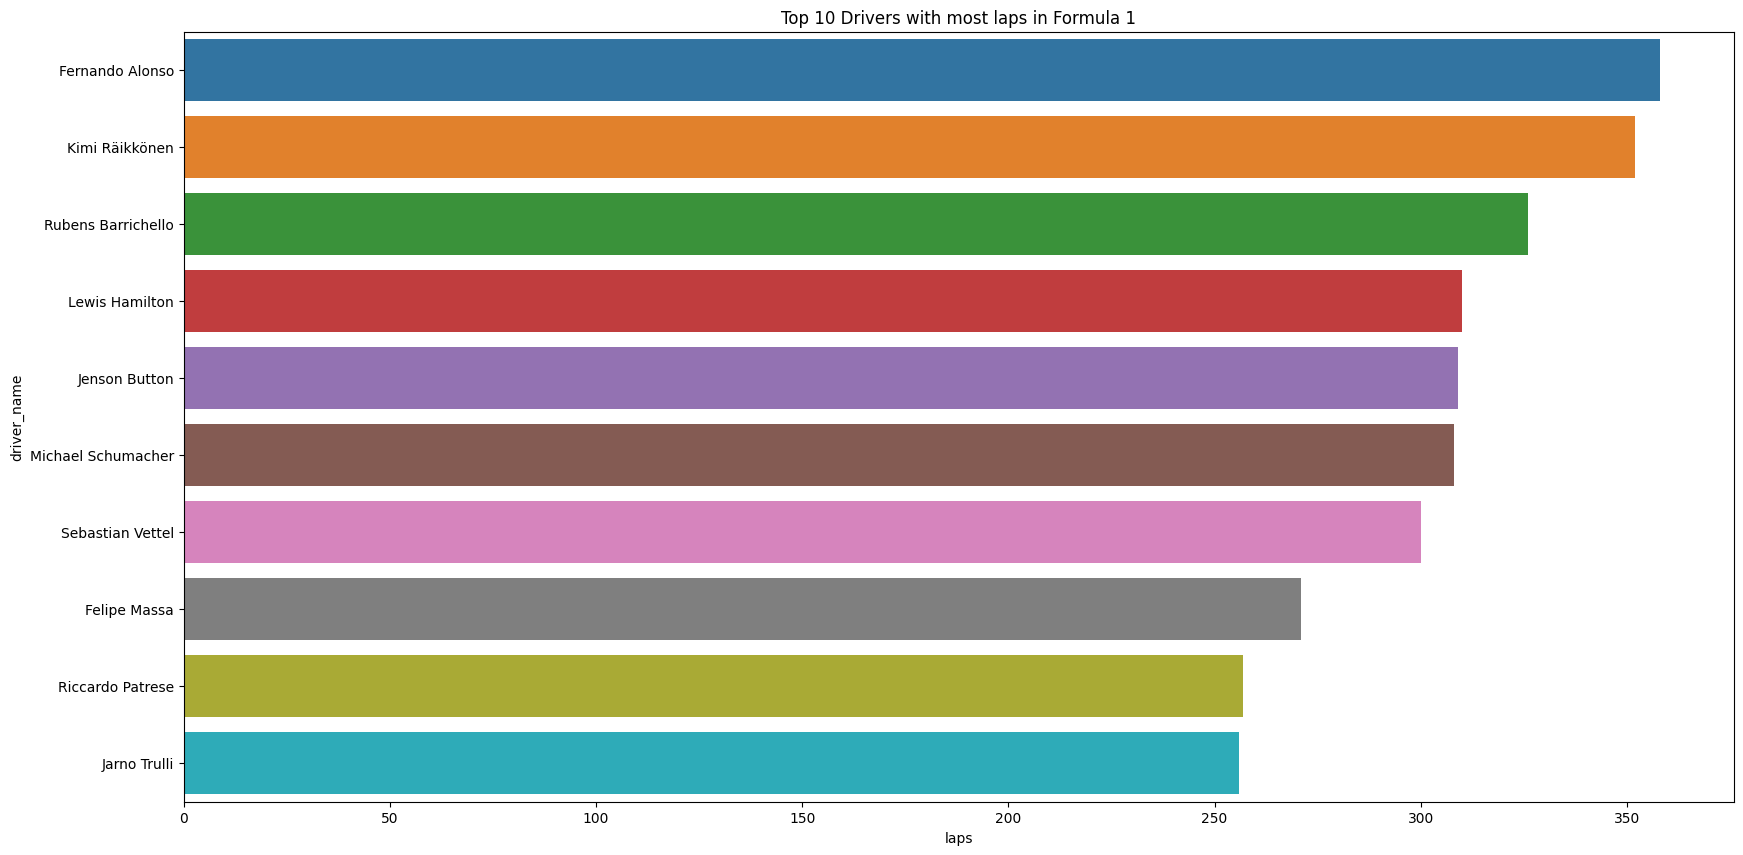

In [14]:
most_laps = merged_df.groupby('driver_name')[['laps']].count().reset_index()
most_laps = most_laps.sort_values('laps', ascending = False).head(10)
plt.figure(figsize = (20,10))
plt.title('Top 10 Drivers with most laps in Formula 1')
sns.barplot(x = 'laps' , y = 'driver_name' , data = most_laps );

Top 10 Drivers with most wins in Formula 1

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


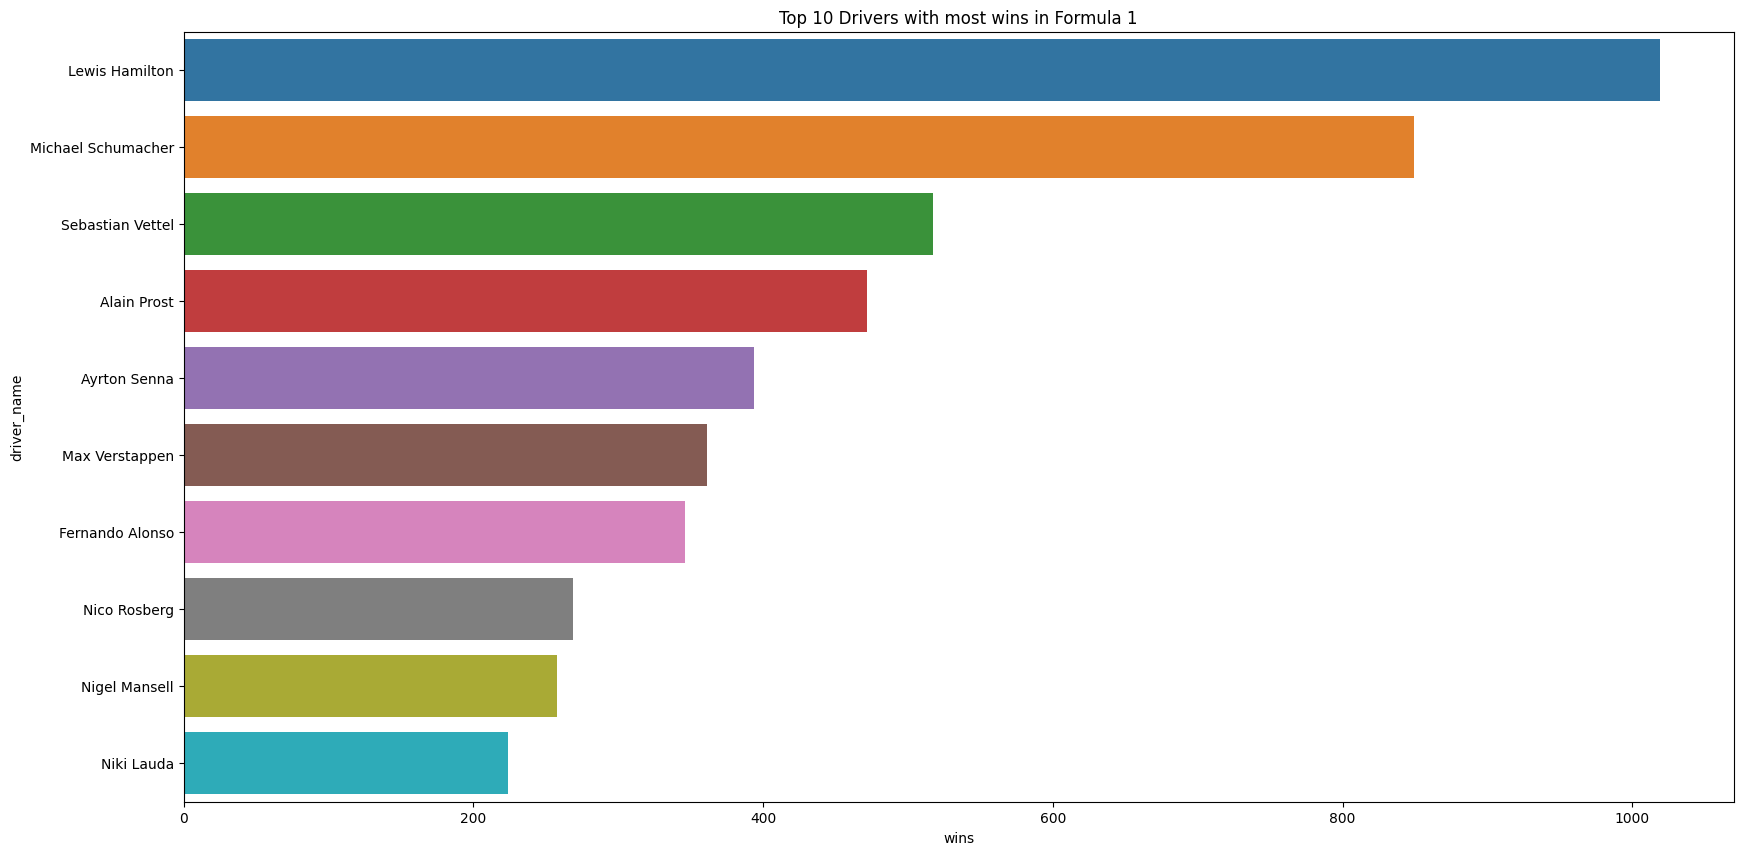

In [15]:

drivers_df = drivers.copy()
drivers_df =drivers_df.drop(columns =['driverRef', 'number', 'code', 'url'])
drivers_df['driver_name'] = drivers_df['forename'] + ' ' + drivers_df['surname']
drivers_df = drivers_df.drop(columns =['forename', 'surname'])
drivers_df.head()
merge_df=pd.merge(drivers_df,drivers_standings,on="driverId")
merge_df.head()
most_wins = merge_df.groupby('driver_name')[['wins']].sum().reset_index()
most_wins = most_wins.sort_values('wins', ascending = False).head(10)
plt.figure(figsize = (20,10))
plt.title('Top 10 Drivers with most wins in Formula 1')
sns.barplot(x = 'wins' , y = 'driver_name' , data = most_wins );


lap_record_holders AT each circuit

In [16]:

# Merge lap_times_df with races_df based on raceId
merged_df = pd.merge(lap_times, races, on='raceId')

# Merge merged_df with drivers_df based on driverId
merged_df = pd.merge(merged_df, drivers, on='driverId')

# Group by circuit and find the fastest lap time for each circuit
fastest_lap_per_circuit = merged_df.groupby(['circuitId', 'name'])['milliseconds'].min().reset_index()

# Merge with merged_df to get the driver details
fastest_lap_per_circuit = pd.merge(fastest_lap_per_circuit, merged_df, on=['circuitId','name','milliseconds'])

# Display the driver who holds the lap record per circuit along with lap timings
lap_record_holders = fastest_lap_per_circuit[['circuitId', 'name', 'surname', 'milliseconds']]
lap_record_holders = lap_record_holders.drop_duplicates(subset=['circuitId'])

print(lap_record_holders)


    circuitId                         name        surname  milliseconds
0           1        Australian Grand Prix        Leclerc         80260
1           2         Malaysian Grand Prix         Vettel         94080
2           3           Bahrain Grand Prix     Schumacher         90252
4           4           Spanish Grand Prix     Fisichella         75641
5           5           Turkish Grand Prix  Pablo Montoya         84770
6           6            Monaco Grand Prix       Hamilton         72909
7           7          Canadian Grand Prix         Bottas         73078
8           8            French Grand Prix      Coulthard         75045
9           9  70th Anniversary Grand Prix       Hamilton         88451
11         10            German Grand Prix      Räikkönen         73780
12         11         Hungarian Grand Prix     Schumacher         76207
13         12          European Grand Prix          Glock         98683
14         13           Belgian Grand Prix      Räikkönen       

In [17]:
pole_positions = results[results['grid'] == 1]

# Merge pole_positions with drivers_df based on driverId
merged_df = pd.merge(pole_positions, drivers, on='driverId')
merged_df.head()

resultId  raceId  driverId  constructorId number_x  grid position  \
0         1      18         1              1       22     1        1   
1       147      24         1              1       22     1       \N   
2       189      27         1              1       22     1        1   
3       213      28         1              1       22     1        5   
4       251      30         1              1       22     1        3   

  positionText  positionOrder  points  ...  fastestLapSpeed statusId  \
0            1              1    10.0  ...          218.300        1   
1            R             19     0.0  ...          202.559        4   
2            1              1    10.0  ...          216.552        1   
3            5              5     4.0  ...          193.533        1   
4            3              3     6.0  ...          233.175        1   

  driverRef number_y code forename   surname         dob nationality  \
0  hamilton       44  HAM    Lewis  Hamilton  1985-01-07     British   
1  hamilton       44  HAM    Lewis  Hamilton  1985-01-07     British   
2  hamilton       44  HAM    Lewis  Hamilton  1985-01-07     British   
3  hamilton       44  HAM    Lewis  Hamilton  1985-01-07     British   
4  hamilton       44  HAM    Lewis  Hamilton  1985-01-07     British   

                                           url  
0  http://en.wikipedia.org/wiki/Lewis_Hamilton  
1  http://en.wikipedia.org/wiki/Lewis_Hamilton  
2  http://en.wikipedia.org/wiki/Lewis_Hamilton  
3  http://en.wikipedia.org/wiki/Lewis_Hamilton  
4  http://en.wikipedia.org/wiki/Lewis_Hamilton  

[5 rows x 26 columns]

which driver has the most pole position?

In [18]:
drivers_df = drivers.copy()
drivers_df =drivers_df.drop(columns =['driverRef', 'number', 'code', 'url'])
drivers_df['driver_name'] = drivers_df['forename'] + ' ' + drivers_df['surname']
drivers_df = drivers_df.drop(columns =['forename', 'surname'])
drivers_df.head()
# Filter for pole positions
pole_positions = results[results['grid'] == 1]

# Merge pole_positions with drivers_df based on driverId
merged_df = pd.merge(pole_positions, drivers_df, on='driverId')

# Group by driver and count the number of pole positions
pole_positions_count = merged_df.groupby(['driverId', 'driver_name'])['grid'].count().reset_index()

# Sort in descending order by pole positions count
pole_positions_count = pole_positions_count.sort_values('grid', ascending=False)

# Display the drivers with the most pole positions
result = pole_positions_count.head(7)[['driver_name', 'grid']]
print(result)

           driver_name  grid
0       Lewis Hamilton   103
16  Michael Schumacher    68
25        Ayrton Senna    65
12    Sebastian Vettel    57
69           Jim Clark    34
28         Alain Prost    33
24       Nigel Mansell    32


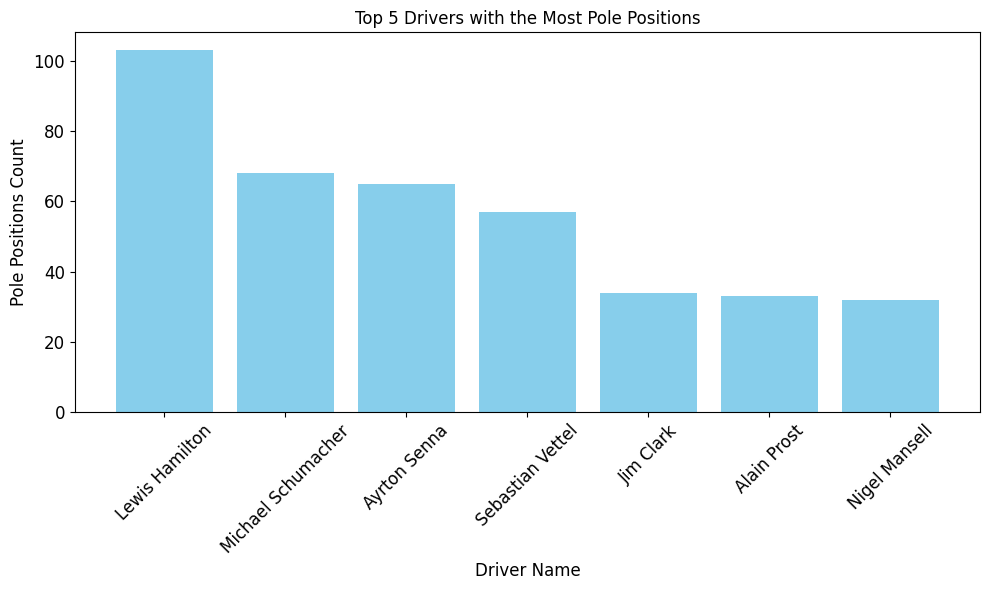

In [19]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the top 5 drivers with the most pole positions
# result contains the data you want to visualize

# Extract driver names and pole position counts from the result
driver_names = result['driver_name']
pole_position_counts = result['grid']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(driver_names, pole_position_counts, color='skyblue')
plt.xlabel('Driver Name',fontsize=12)
plt.ylabel('Pole Positions Count',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 5 Drivers with the Most Pole Positions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()






Top 10 Constructors with the Most Wins in Formula 1 History

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


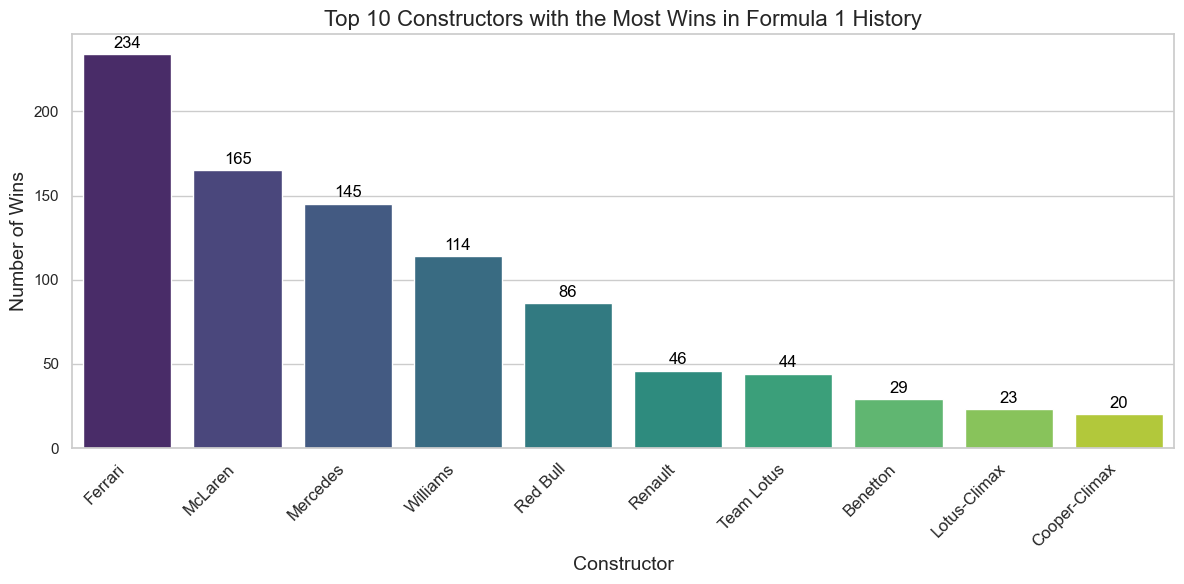

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the provided dataframes loaded

# Merge constructor standings with constructor data
merged_data = pd.merge(con_std, con, on='constructorId')

# Filter for constructor standings with position 1 (winning)
winning_constructors = merged_data[merged_data['position'] == 1]

# Count the number of wins for each constructor
constructor_wins = winning_constructors['name'].value_counts()

# Get the top 10 constructors with the most wins
top_constructors = constructor_wins.head(10)

# Set up a Seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Create the bar chart using Seaborn
ax = sns.barplot(x=top_constructors.index, y=top_constructors.values, palette='viridis')
ax.set_xlabel('Constructor', fontsize=14)
ax.set_ylabel('Number of Wins', fontsize=14)
ax.set_title('Top 10 Constructors with the Most Wins in Formula 1 History', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 8),
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


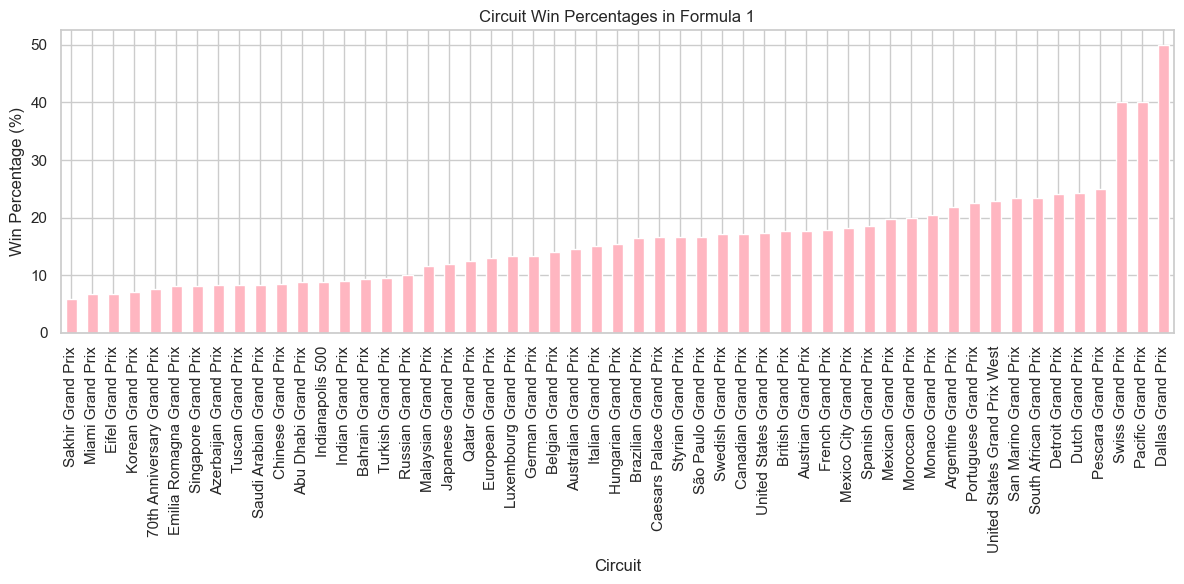

In [21]:
race_results = pd.merge(races, results, on='raceId')
finished_races = race_results[race_results['statusId'] == 1]
winning_races = finished_races[finished_races['positionOrder'] == 1]
circuit_win_counts = winning_races['name'].value_counts()
circuit_race_counts = finished_races['name'].value_counts()
win_percentages = (circuit_win_counts / circuit_race_counts) * 100
plt.figure(figsize=(12, 6))
win_percentages.sort_values().plot(kind='bar', color='lightpink')
plt.xlabel('Circuit')
plt.ylabel('Win Percentage (%)')
plt.title('Circuit Win Percentages in Formula 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

narrow streets have high winning probability with pole position 1

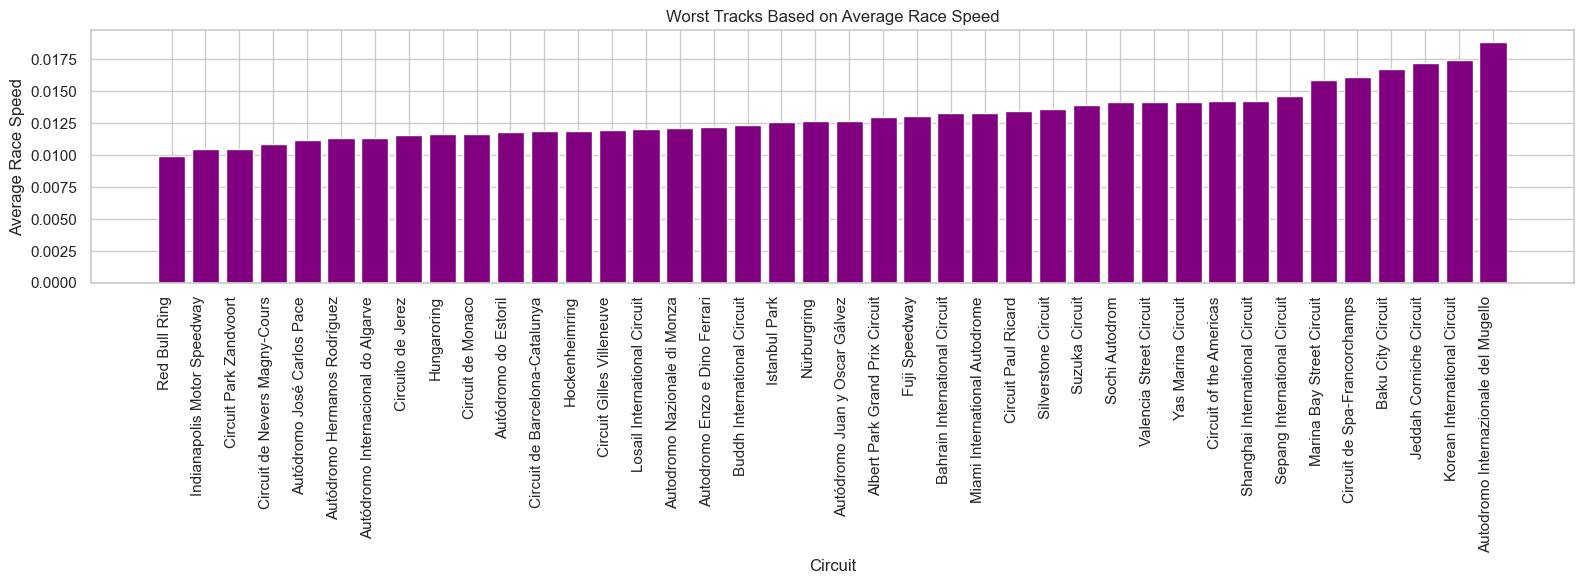

In [22]:
merged_data = pd.merge(races, lap_times, on='raceId')
merged_data['average_speed'] = merged_data['milliseconds'] / merged_data['milliseconds'].max() 
average_speed_by_track = merged_data.groupby('circuitId')['average_speed'].mean().reset_index()
average_speed_by_track = pd.merge(average_speed_by_track, cir, left_on='circuitId', right_on='circuitId')
worst_tracks = average_speed_by_track.sort_values(by='average_speed')
plt.figure(figsize=(16, 6))
plt.bar(worst_tracks['name'], worst_tracks['average_speed'], color='purple')
plt.xlabel('Circuit')
plt.ylabel('Average Race Speed')
plt.title('Worst Tracks Based on Average Race Speed')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
stats=pd.merge(stat,results,on="statusId")
status=pd.merge(stats,con,on="constructorId")
status.head()

statusId    status  resultId  raceId  driverId  constructorId number  grid  \
0         1  Finished         1      18         1              1     22     1   
1         1  Finished         5      18         5              1     23     3   
2         1  Finished        25      19         5              1     23     8   
3         1  Finished        27      19         1              1     22     9   
4         1  Finished        49      20         5              1     23     5   

  position positionText  ...         time  milliseconds  fastestLap rank  \
0        1            1  ...  1:34:50.616       5690616          39    2   
1        5            5  ...      +18.014       5708630          43    1   
2        3            3  ...      +38.450       5517005          19    7   
3        5            5  ...      +46.548       5525103          53    3   
4        5            5  ...      +26.789       5493759          49    1   

  fastestLapTime fastestLapSpeed constructorRef     name nationality  \
0       1:27.452         218.300        mclaren  McLaren     British   
1       1:27.418         218.385        mclaren  McLaren     British   
2       1:35.922         208.031        mclaren  McLaren     British   
3       1:35.462         209.033        mclaren  McLaren     British   
4       1:33.193         209.062        mclaren  McLaren     British   

                                    url  
0  http://en.wikipedia.org/wiki/McLaren  
1  http://en.wikipedia.org/wiki/McLaren  
2  http://en.wikipedia.org/wiki/McLaren  
3  http://en.wikipedia.org/wiki/McLaren  
4  http://en.wikipedia.org/wiki/McLaren  

[5 rows x 23 columns]

In [24]:
races.head()

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
0       \N       \N       \N       \N       \N         \N         \N   
1       \N       \N       \N       \N       \N         \N         \N   
2       \N       \N       \N       \N       \N         \N         \N   
3       \N       \N       \N       \N       \N         \N         \N   
4       \N       \N       \N       \N       \N         \N         \N   

  sprint_date sprint_time  
0          \N          \N  
1          \N          \N  
2          \N          \N  
3          \N          \N  
4          \N          \N

In [25]:
sta=pd.merge(stat,results,on="statusId")
sts=pd.merge(sta,con,on="constructorId")
statu=pd.merge(sts,con,on="constructorId")
status=pd.merge(statu,races,on='raceId')
statuss=pd.merge(status,cir,on='circuitId', suffixes=('_left', '_right'))
statuss.head()

statusId     status  resultId  raceId  driverId  constructorId number  \
0         1   Finished         1      18         1              1     22   
1         1   Finished         5      18         5              1     23   
2         1   Finished         2      18         2              2      3   
3         4  Collision         9      18         9              2      4   
4         1   Finished         3      18         3              3      7   

   grid position positionText  ...  sprint_date  sprint_time   circuitRef  \
0     1        1            1  ...           \N           \N  albert_park   
1     3        5            5  ...           \N           \N  albert_park   
2     5        2            2  ...           \N           \N  albert_park   
3     2       \N            R  ...           \N           \N  albert_park   
4     7        3            3  ...           \N           \N  albert_park   

                       name_right   location    country      lat      lng alt  \
0  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
1  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
2  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
3  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
4  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   

                                           url_right  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
2  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
3  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
4  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  

[5 rows x 52 columns]

In [26]:
merged_df.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1       147      24         1              1     22     1       \N   
2       189      27         1              1     22     1        1   
3       213      28         1              1     22     1        5   
4       251      30         1              1     22     1        3   

  positionText  positionOrder  points  ...         time milliseconds  \
0            1              1    10.0  ...  1:34:50.616      5690616   
1            R             19     0.0  ...           \N           \N   
2            1              1    10.0  ...  1:31:20.874      5480874   
3            5              5     4.0  ...      +23.048      5870115   
4            3              3     6.0  ...      +10.539      4989933   

  fastestLap rank fastestLapTime fastestLapSpeed statusId         dob  \
0         39    2       1:27.452         218.300        1  1985-01-07   
1          4    3       1:17.506         202.559        4  1985-01-07   
2         17    2       1:16.039         216.552        1  1985-01-07   
3         15    3       1:21.493         193.533        1  1985-01-07   
4         20    2       1:48.135         233.175        1  1985-01-07   

  nationality     driver_name  
0     British  Lewis Hamilton  
1     British  Lewis Hamilton  
2     British  Lewis Hamilton  
3     British  Lewis Hamilton  
4     British  Lewis Hamilton  

[5 rows x 21 columns]

In [27]:
races_df = races.drop(columns = ['url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'time'])
races_df = races_df.rename(columns ={'name':'race_name'})
circuits_df = cir.copy()
circuits_df =circuits_df.drop(columns = ['lat', 'lng','alt', 'url'])
circuits_df = circuits_df.rename(columns={'name':'circuit_name', 'location':'city'})
drivers_df = drivers.copy()
drivers_df =drivers_df.drop(columns =['driverRef', 'number', 'code', 'url'])
drivers_df['driver_name'] = drivers_df['forename'] + ' ' + drivers_df['surname']
drivers_df = drivers_df.drop(columns =['forename', 'surname'])
constructors_df=con.copy()
constructors_df =constructors_df.drop(columns = ['url','constructorRef'])
constructors_df = constructors_df.rename(columns = {'name':'constructors_name'})
results_copy_df=results.copy()
merged_df = results_copy_df.merge(stat , on = 'statusId')
merged_df = merged_df.merge(races_df, on = 'raceId')
merged_df = merged_df.merge(drivers_df, on = 'driverId')
merged_df = merged_df.merge(constructors_df, on = 'constructorId')
merged_df = merged_df.merge(circuits_df , on = 'circuitId')

In [28]:
merged_df.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1       371      36         1              1      2     4        3   
2      7573       1         1              1      1    18       \N   
3     20352     338         1              1      2    11        6   
4     20780     841         1              1      3     2        2   

  positionText  positionOrder  points  ...        date         dob  \
0            1              1    10.0  ...  2008-03-16  1985-01-07   
1            3              3     6.0  ...  2007-03-18  1985-01-07   
2            D             20     0.0  ...  2009-03-29  1985-01-07   
3            6              6     8.0  ...  2010-03-28  1985-01-07   
4            2              2    18.0  ...  2011-03-27  1985-01-07   

  nationality_x     driver_name constructors_name nationality_y   circuitRef  \
0       British  Lewis Hamilton           McLaren       British  albert_park   
1       British  Lewis Hamilton           McLaren       British  albert_park   
2       British  Lewis Hamilton           McLaren       British  albert_park   
3       British  Lewis Hamilton           McLaren       British  albert_park   
4       British  Lewis Hamilton           McLaren       British  albert_park   

                     circuit_name       city    country  
0  Albert Park Grand Prix Circuit  Melbourne  Australia  
1  Albert Park Grand Prix Circuit  Melbourne  Australia  
2  Albert Park Grand Prix Circuit  Melbourne  Australia  
3  Albert Park Grand Prix Circuit  Melbourne  Australia  
4  Albert Park Grand Prix Circuit  Melbourne  Australia  

[5 rows x 33 columns]

In [29]:
hybrid_era_results = merged_df[(merged_df['year'].between(2014,2022, inclusive = 'both'))]

In [30]:
hybrid_era_results.positionText.unique()

array(['R', '5', '3', '11', '14', '6', '2', 'W', '13', '9', '12', '1',
       '4', '8', '17', '10', '16', '15', '7', 'D', 'N', '18', '19', '20',
       '21', '22', 'E'], dtype=object)

In [31]:
races_finished = pd.to_numeric(hybrid_era_results['positionText'], errors = 'coerce').groupby(hybrid_era_results['constructors_name']).count()
races_finished = races_finished.reset_index()

In [32]:
races_entries = hybrid_era_results.groupby('constructors_name')[['raceId']].count().reset_index()

entries_finishes = races_finished.merge(races_entries, on = 'constructors_name')

entries_finishes = entries_finishes.rename(columns ={'positionText': 'races_finished', 'raceId': 'total_entries'})

entries_finishes['reliablility'] =  (entries_finishes['races_finished']/entries_finishes['total_entries'])*100

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


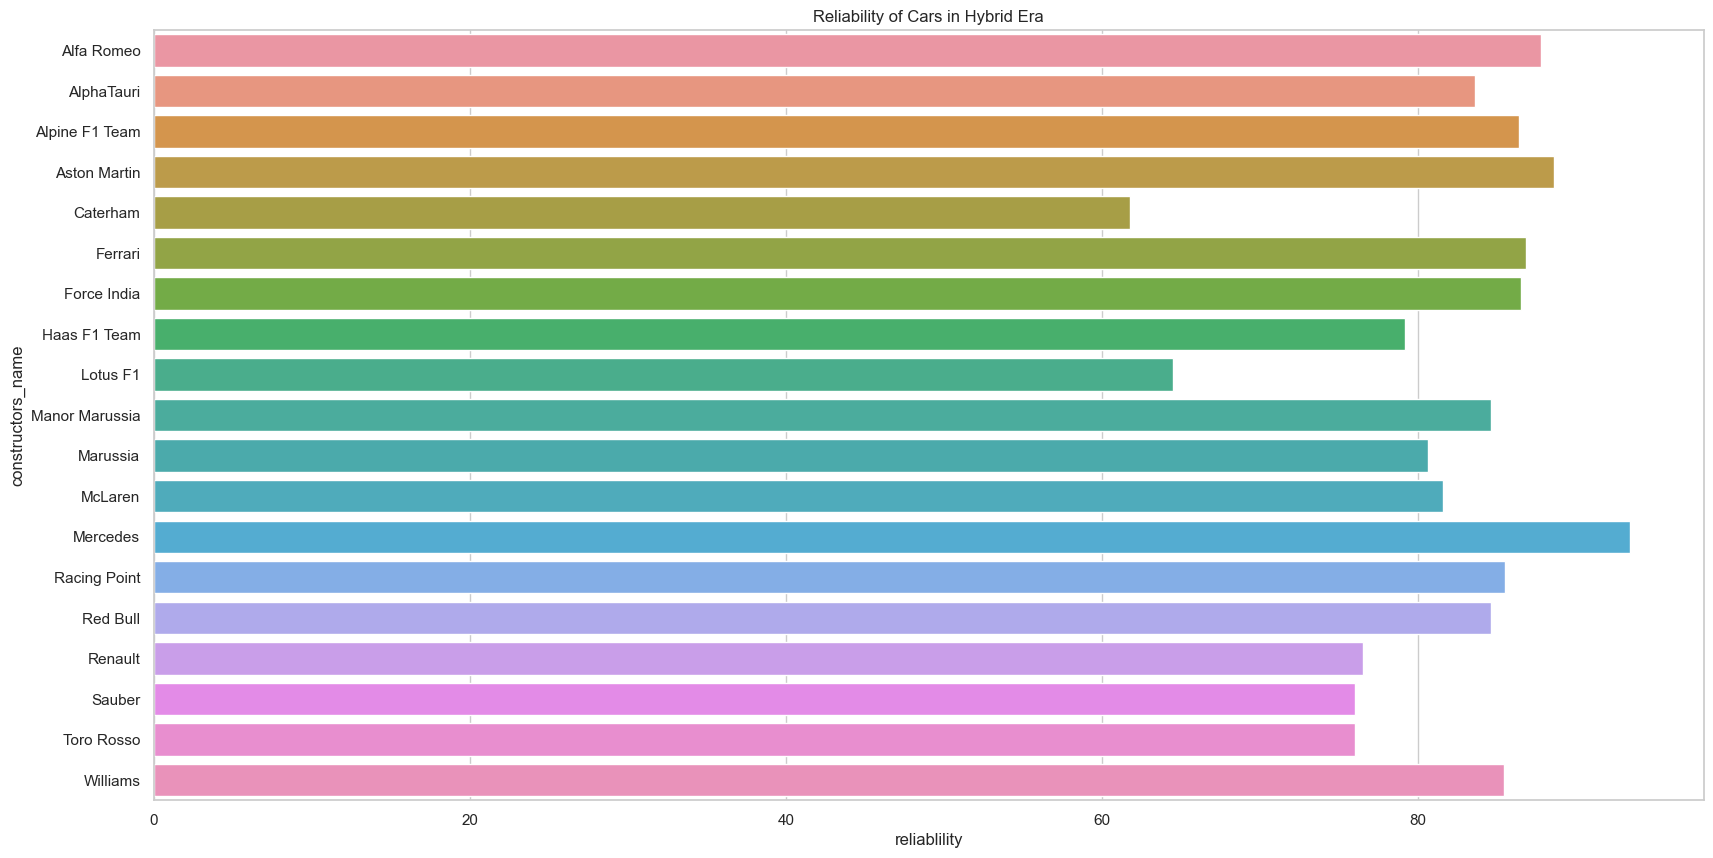

In [33]:
plt.figure(figsize = (20,10))
plt.title('Reliability of Cars in Hybrid Era')
a =sns.barplot(x= 'reliablility', y  = 'constructors_name',data = entries_finishes);

In [34]:
#joining resulDF with driversDF by column driverID,using inner join
dfresul = pd.merge(results,drivers,on='driverId')
#joining racesDF with dfresul by column raceID,using inner join
dfresulcons = pd.merge(dfresul,races,on='raceId')
#joining constructorDF with dfresulcons by column constructorID,using inner join
dfresulrac = pd.merge(dfresulcons,con,on='constructorId')



import plotly.graph_objects as go 
driver_pole = dfresulrac[dfresulrac['grid']== 1].groupby(by=['driverRef','nationality_x'])['grid'].sum().reset_index()
driver_pole = driver_pole.sort_values(by=['grid'], ascending=False)
fig = go.Figure(data=[go.Bar(
    x=driver_pole['driverRef'],
    y=driver_pole['grid'],
    hovertext = driver_pole['nationality_x']
)])
fig.update_layout(title={
        'text': "Drivers with more pole positions",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
                  yaxis=dict(
                            title='Pole positions',
                            titlefont_size=16,
                            tickfont_size=14),
                  xaxis=dict(
                            title='Driver',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark")
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8212\729365248.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



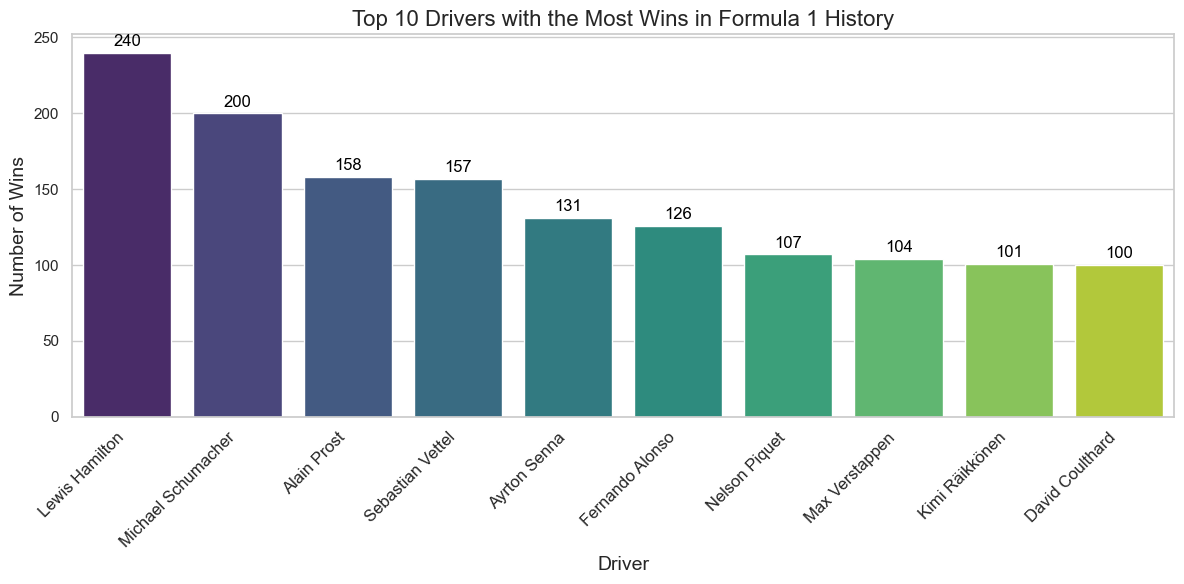

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the 'drivers' and 'drivers_standings' DataFrames

# Merge the 'drivers' and 'drivers_standings' DataFrames on 'driverId'
merged_data = pd.merge(drivers, drivers_standings, on='driverId')

# Filter drivers with wins
winning_drivers = merged_data[merged_data['wins']>0]

# Create a new column for driver names
winning_drivers['driver_name'] = winning_drivers['forename'] + ' ' + winning_drivers['surname']

# Count the number of wins for each driver
drivers_wins = winning_drivers['driver_name'].value_counts()

# Select the top 10 drivers with the most wins
top_drivers = drivers_wins.head(10)

# Create the bar chart
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_drivers.index, y=top_drivers.values, palette='viridis')
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Number of Wins', fontsize=14)
ax.set_title('Top 10 Drivers with the Most Wins in Formula 1 History', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 8),
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


In [36]:
import datetime as dt
circuits = cir.rename(columns={'name':'circuitName','location':'circuitLocation','country':'circuitCountry','url':'circuitUrl'})
drivers = drivers.rename(columns={'nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
constructors = con.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})
# races.index = races.index.set_names(['raceId','year','round','circuitId','raceName','date','time','raceUrl','a','b'])
# races = races[[]].reset_index()[['raceId','year','round','circuitId','raceName','date','time','raceUrl']]
races['date'] = races['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
pit_stops = pit_stops.rename(columns={'time':'pitTime'})
pit_stops['seconds'] = pit_stops['milliseconds'].apply(lambda x: x/1000)
results['milliseconds'] = pd.to_numeric(results['milliseconds'], errors='coerce')
results['seconds'] = results['milliseconds'] / 1000



newResults = pd.merge(results,races,left_on='raceId',right_index=True,how='left')
newResults = pd.merge(newResults,cir,left_on='circuitId',right_index=True,how='left')
newResults = pd.merge(newResults,con,left_on='constructorId',right_index=True,how='left')
newResults = pd.merge(newResults,drivers,left_on='driverId',right_index=True,how='left')
newResults

resultId  raceId_x  driverId_x  constructorId_x number_x  grid  \
0             1        18           1                1       22     1   
1             2        18           2                2        3     5   
2             3        18           3                3        7     7   
3             4        18           4                4        5    11   
4             5        18           5                1       23     3   
...         ...       ...         ...              ...      ...   ...   
25835     25841      1096         854              210       47    12   
25836     25842      1096         825              210       20    16   
25837     25843      1096           1              131       44     5   
25838     25844      1096         849                3        6    20   
25839     25845      1096           4              214       14    10   

      position positionText  positionOrder  points  ...  driverId_y  \
0            1            1              1    10.0  ...           2   
1            2            2              2     8.0  ...           3   
2            3            3              3     6.0  ...           4   
3            4            4              4     5.0  ...           5   
4            5            5              5     4.0  ...           6   
...        ...          ...            ...     ...  ...         ...   
25835       16           16             16     0.0  ...         856   
25836       17           17             17     0.0  ...         826   
25837       18           18             18     0.0  ...           2   
25838       19           19             19     0.0  ...         851   
25839       \N            R             20     0.0  ...           5   

        driverRef  number_y code  forename     surname         dob  \
0        heidfeld        \N  HEI      Nick    Heidfeld  1977-05-10   
1         rosberg         6  ROS      Nico     Rosberg  1985-06-27   
2          alonso        14  ALO  Fernando      Alonso  1981-07-29   
3      kovalainen        \N  KOV    Heikki  Kovalainen  1981-10-19   
4        nakajima        \N  NAK    Kazuki    Nakajima  1985-01-11   
...           ...       ...  ...       ...         ...         ...   
25835    de_vries        45  DEV      Nyck    de Vries  1995-02-06   
25836       kvyat        26  KVY    Daniil       Kvyat  1994-04-26   
25837    heidfeld        \N  HEI      Nick    Heidfeld  1977-05-10   
25838      aitken        89  AIT      Jack      Aitken  1995-09-23   
25839  kovalainen        \N  KOV    Heikki  Kovalainen  1981-10-19   

       driverNationality                                       driverUrl  \
0                 German      http://en.wikipedia.org/wiki/Nick_Heidfeld   
1                 German       http://en.wikipedia.org/wiki/Nico_Rosberg   
2                Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso   
3                Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen   
4               Japanese    http://en.wikipedia.org/wiki/Kazuki_Nakajima   
...                  ...                                             ...   
25835              Dutch      http://en.wikipedia.org/wiki/Nyck_de_Vries   
25836            Russian       http://en.wikipedia.org/wiki/Daniil_Kvyat   
25837             German      http://en.wikipedia.org/wiki/Nick_Heidfeld   
25838            British        http://en.wikipedia.org/wiki/Jack_Aitken   
25839            Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen   

              driverName  
0          Nick Heidfeld  
1           Nico Rosberg  
2        Fernando Alonso  
3      Heikki Kovalainen  
4        Kazuki Nakajima  
...                  ...  
25835      Nyck de Vries  
25836       Daniil Kvyat  
25837      Nick Heidfeld  
25838        Jack Aitken  
25839  Heikki Kovalainen  

[25840 rows x 61 columns]

In [37]:
races.head()

raceId  year  round  circuitId                   name       date      time  \
0       1  2009      1          1  Australian Grand Prix 2009-03-29  06:00:00   
1       2  2009      2          2   Malaysian Grand Prix 2009-04-05  09:00:00   
2       3  2009      3         17     Chinese Grand Prix 2009-04-19  07:00:00   
3       4  2009      4          3     Bahrain Grand Prix 2009-04-26  12:00:00   
4       5  2009      5          4     Spanish Grand Prix 2009-05-10  12:00:00   

                                                 url fp1_date fp1_time  \
0  http://en.wikipedia.org/wiki/2009_Australian_G...       \N       \N   
1  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N       \N   
2  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N       \N   
3  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N       \N   
4  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N       \N   

  fp2_date fp2_time fp3_date fp3_time quali_date quali_time sprint_date  \
0       \N       \N       \N       \N         \N         \N          \N   
1       \N       \N       \N       \N         \N         \N          \N   
2       \N       \N       \N       \N         \N         \N          \N   
3       \N       \N       \N       \N         \N         \N          \N   
4       \N       \N       \N       \N         \N         \N          \N   

  sprint_time  
0          \N  
1          \N  
2          \N  
3          \N  
4          \N

In [38]:
import pandas as pd
nRowsRead = 1000

# Read the CSV file with the specified number of rows
df3 = pd.read_csv('constructor_standings.csv', delimiter=',', nrows=nRowsRead)

# Set a name for the dataframe
df3.dataframeName = 'constructor_standings.csv'

# Get the number of rows and columns in the dataframe
nRow, nCol = df3.shape

# Print the dimensions and the first 5 rows of the dataframe
print(f'There are {nRow} rows and {nCol} columns')
df3.head(5)


There are 1000 rows and 7 columns


constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1      14         1   
1                       2      18              2       8         3   
2                       3      18              3       9         2   
3                       4      18              4       5         4   
4                       5      18              5       2         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

constructorStandingsId     int64
raceId                     int64
constructorId              int64
points                     int64
position                   int64
positionText              object
wins                       int64
dtype: object


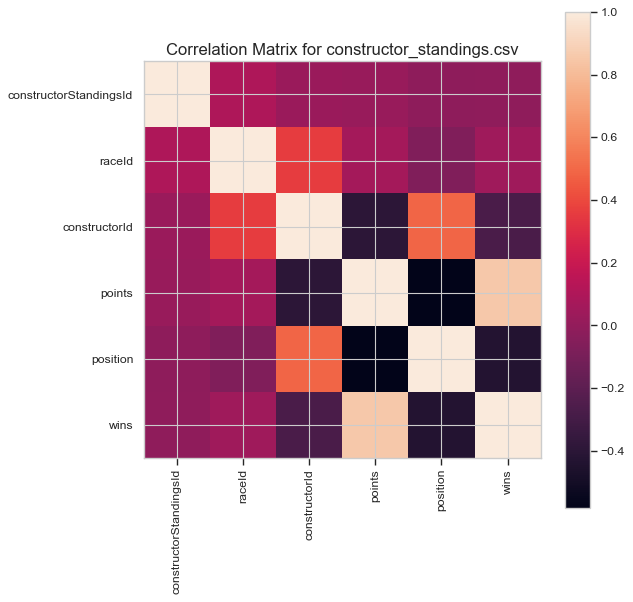

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nRowsRead = 1000

# Read the CSV file with the specified number of rows
df3 = pd.read_csv('constructor_standings.csv', delimiter=',', nrows=nRowsRead)

# Set a name for the dataframe
df3.dataframeName = 'constructor_standings.csv'

# Check data types of columns
print(df3.dtypes)

# Assuming 'column_to_convert' is the column you want to convert to numeric
# Example: df3['column_to_convert'] = pd.to_numeric(df3['column_to_convert'], errors='coerce')

# Remove non-numeric columns
numeric_df = df3.select_dtypes(include=[float, int])

# Handle missing values if needed
# numeric_df = numeric_df.dropna()

if numeric_df.shape[1] < 2:
    print(f'No correlation plots shown: The number of numeric columns ({numeric_df.shape[1]}) is less than 2')
else:
    corr = numeric_df.corr()
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {df3.dataframeName}', fontsize=15)
    plt.show()
